In [10]:
%matplotlib inline
import matplotlib
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from scipy import stats
from scipy import mean
import datetime as dt

In [11]:
import numpy as np
import pandas as pd

In [12]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [13]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [14]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [15]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [16]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [17]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [18]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [19]:
inspector = inspect(engine)

# Exploratory Climate Analysis

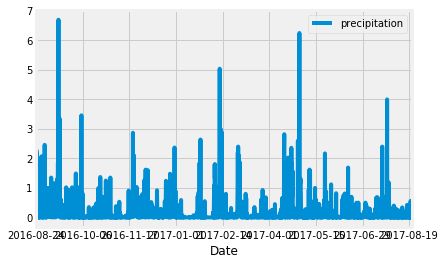

In [30]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

#results = session.query(Measurement.date, Measurement.prcp).\
#    filter(Measurement.date > '2016-08-22').all()
#results
    
# Calculate the date 1 year ago from the last data point in the database -- done
#query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
#print("Query Date: ", query_date)


# Perform a query to retrieve the date and precipitation scores -- done
#results = session.query(Measurement.date, Measurement.prcp).\
#    order_by(Measurement.date.desc()).all()
#results


# Save the query results as a Pandas DataFrame and set the index to the date column -- done
#df = pd.DataFrame(results, columns =['date', 'prcp'])
#df.set_index('date', inplace=True, )
#df.head(10)


# Sort the dataframe by date -- done
#df_sort = df.sort_values(by='date')
#df_sort

# Use Pandas Plotting with Matplotlib to plot the data
#df_sort.plot.bar(figsize=(20,10))
#plt.figure()

##did two verisons...###

# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date

# Calculate the date 1 year ago from the last data point in the database
last_year = dt.datetime.strptime(last_date, '%Y-%m-%d') - dt.timedelta(days=365)

# Perform a query to retrieve the date and precipitation scores 
rain_results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= last_year).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column 
precipitation_df = pd.DataFrame(rain_results, columns=['Date', 'precipitation'])
precipitation_df.set_index('Date', inplace=True)
precipitation_df = precipitation_df.dropna()

# Use Pandas Plotting with Matplotlib to plot the data
ax = precipitation_df.plot().get_figure()



In [33]:
# Use Pandas to calcualte the summary statistics for the precipitation data
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-22').all()
#results

df = pd.DataFrame(results, columns =['date', 'prcp'])
df.set_index('date', inplace=True, )
df.head(10)


df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [21]:
# Design a query to show how many stations are available in this dataset?  -- done
locations = session.query(Measurement).group_by(Measurement.station).count()
print(locations)


9


In [95]:
# What are the most active stations? (i.e. what stations have the most rows)?  --done
session.query(Measurement.station, func.count(Measurement.date)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.date).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [93]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
def calc_temps(start_date, end_date):

    return session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
        filter(Measurement.station == "USC00519281").all()

print(calc_temps('2016-08-23', '2017-08-23'))    

[(54.0, 85.0, 71.66378066378067)]


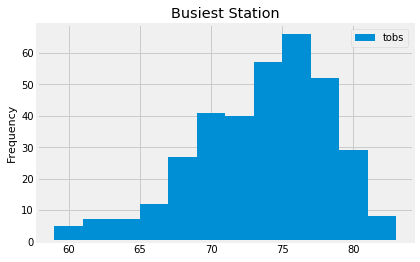

In [42]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
#last_year = dt.datetime.strptime(last_date, '%Y-%m-%d') - dt.timedelta(days=365)

#hist = session.query(Measurement.date, Measurement.tobs).\
 #   filter(Measurement.date >= 'last_year').\
  #  filter(Measurement.station == "USC00519281").all()
#hist

#temp_obv = pd.DataFrame(hist, columns =['date','tobs'])
#temp_obv.head(10)

#temp_obv.plot.hist()
#plt.title("Busiest Station")
#plt.xlabel("Observations")

last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
last_year = dt.datetime.strptime(last_date, '%Y-%m-%d') - dt.timedelta(days=365)
temp_results = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == "USC00519281").filter(Measurement.date >= last_year).\
    group_by(Measurement.date).all()

# Put data into dataframe so it can be plotted as histogram
temp_results_df = pd.DataFrame(data=temp_results, columns=["date", "tobs"])
temp_results_df = temp_results_df.set_index('date', drop=True)

#Plot the results as a histogram with bins=12
plt.hist(temp_results_df['tobs'],12, label="tobs")
plt.ylabel("Frequency", fontsize=11)
plt.title("Busiest Station")
plt.legend()
plt.show()


![precipitation](Images/station-histogram.png)

In [47]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [48]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
def calc_temps_py(start_date, end_date):

    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps_py('2011-02-28', '2011-03-05'))

#bar_temps = pd.DataFrame(calc_temps_py, columns =['date', 'tobs'])
#bar_temps.head(10)



[(61.0, 69.75510204081633, 75.0)]


In [50]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
df=pd.DataFrame(calc_temps_py, columns =['date', 'tobs'])




ValueError: DataFrame constructor not properly called!

In [51]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

from sqlalchemy import join
from sqlalchemy.sql import select

sel = [Measurement.station, Station.name, Measurement.prcp, Station.latitude, Station.longitude, Station.elevation]
rainfall = session.query(*sel).filter(Measurement.station == Station.station, Measurement.date > '2011-02-28', Measurement.date < '2011-03-05').\
    group_by(Measurement.station).\
    order_by(func.sum(Measurement.prcp).desc()).all()
rainfall

df = pd.DataFrame(rainfall, columns =['Measurement.station','Station.name', 'Measurement.prcp', 'Station.latitude', 'Station.longitude', 'Station.elevation'])
#df.set_index('Measurement.station', inplace=True, )
df.head(10)

df_sort=df.sort_values(by="Measurement.prcp")
df_sort



,Measurement.station,Station.name,Measurement.prcp,Station.latitude,Station.longitude,Station.elevation
7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",0.00,21.31520,-157.99920,0.9
0,USC00518838,"UPPER WAHIAWA 874.3, HI US",0.02,21.49920,-158.01110,306.6
1,USC00519281,"WAIHEE 837.5, HI US",0.03,21.45167,-157.84889,32.9
3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",0.05,21.52130,-157.83740,7.0
6,USC00519397,"WAIKIKI 717.2, HI US",0.10,21.27160,-157.81680,3.0
4,USC00513117,"KANEOHE 838.1, HI US",0.14,21.42340,-157.80150,14.6
2,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",0.18,21.33556,-157.71139,19.5
5,USC00516128,"MANOA LYON ARBO 785.2, HI US",0.22,21.33310,-157.80250,152.4
8,USC00517948,"PEARL CITY, HI US",NaN,21.39340,-157.97510,11.9


## Optional Challenge Assignment

In [82]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Strip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
